In [1]:
# Use the edgelist CSV formatted file to build graphs for visualization (Networkx, matplotlib) 
import os
import pandas as pd
import numpy as np
import csv
import seaborn as sns

import networkx as nx

# matplotlib graphs will be included in notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."

def save_fig(filename, tight_layout=True):
    data_path = os.path.join(PROJECT_ROOT_DIR, "images")    
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    
    fullpath_filename = os.path.join(data_path, filename + ".jpg")
    print("Saving image : ", fullpath_filename)
    
    if tight_layout:
        plt.tight_layout()
        
    plt.savefig(fullpath_filename, format='jpg', dpi=300)

In [2]:
# This file contains all edges to be constructed
# Duplicate edges will be represented as only 1 edge forming the group of unique venues (equals to the degree of author)
df = pd.read_csv('./datasets/BhowmickSouravS_noTags.csv')
df.shape

(889, 2)

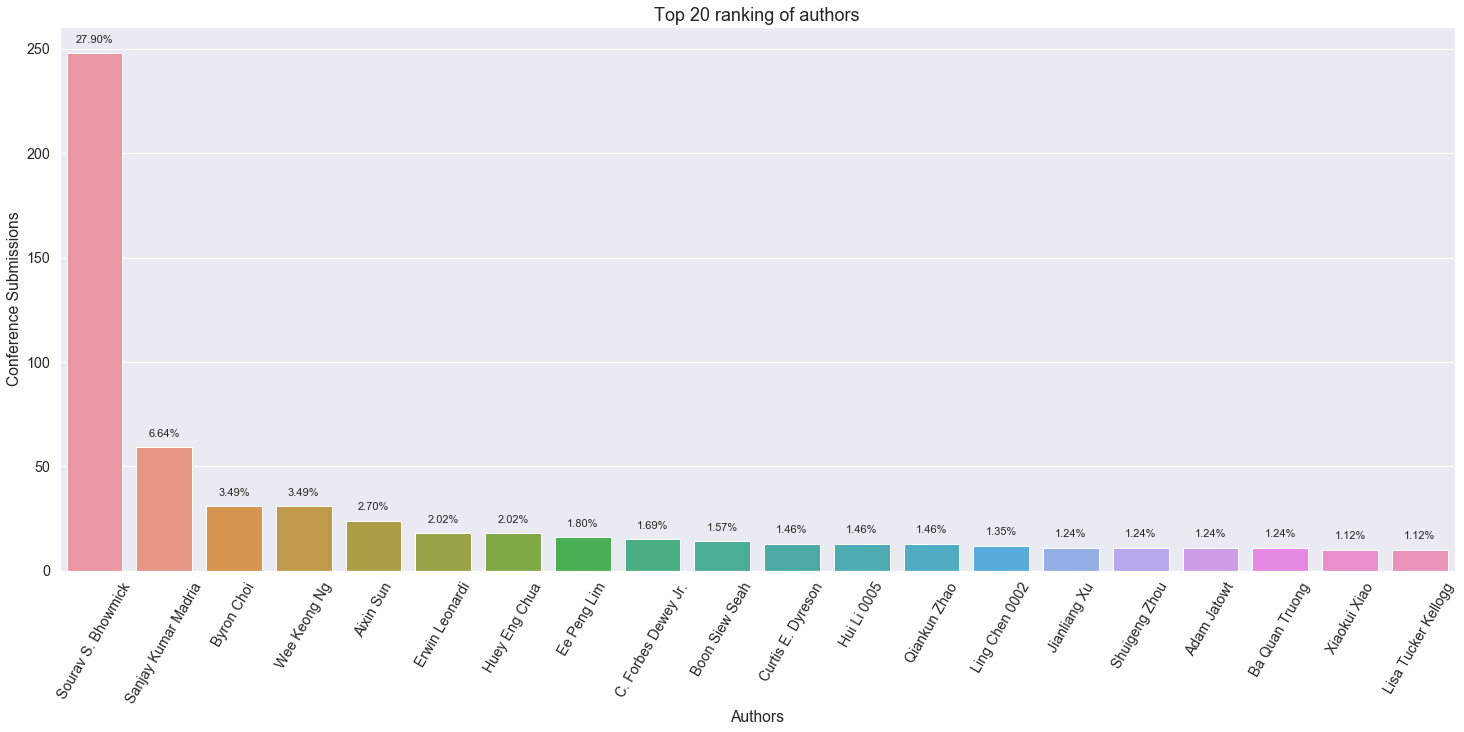

Total no. of authors : 175
Missing Data for authors : 0.00%
Top 20 :
 Author
Sourav S. Bhowmick      Sourav S. Bhowmick
Sanjay Kumar Madria    Sanjay Kumar Madria
Byron Choi                      Byron Choi
Wee Keong Ng                  Wee Keong Ng
Aixin Sun                        Aixin Sun
Erwin Leonardi              Erwin Leonardi
Huey Eng Chua                Huey Eng Chua
Ee Peng Lim                    Ee Peng Lim
C. Forbes Dewey Jr.    C. Forbes Dewey Jr.
Boon Siew Seah              Boon Siew Seah
Hui Li 0005                    Hui Li 0005
Qiankun Zhao                  Qiankun Zhao
Curtis E. Dyreson        Curtis E. Dyreson
Ling Chen 0002              Ling Chen 0002
Jianliang Xu                  Jianliang Xu
Shuigeng Zhou                Shuigeng Zhou
Adam Jatowt                    Adam Jatowt
Ba Quan Truong              Ba Quan Truong
Xiaokui Xiao                  Xiaokui Xiao
Lisa Tucker Kellogg    Lisa Tucker Kellogg
Name: author, dtype: object
Total number of conference submissi

In [3]:
# Plotting top rank authors
author_Grp = pd.DataFrame()
author_Grp['authorCount'] = df.groupby(['Author'])['Author'].count()
author_Grp['author'] = author_Grp.index
topmost = 20
total_counts = len(df)

# There are too many authors, so we will subset the top authors
author_Grp_top = author_Grp.sort_values(by='authorCount',ascending=False).head(topmost)
order_authors = author_Grp_top.sort_values(by='authorCount',ascending=False)['author']

plt.figure(figsize=(25, 10))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x='author', y='authorCount', data=author_Grp_top, order=order_authors)
ax.set_title('Top ' + str(topmost) + ' ranking of authors', fontsize=18)
for rectBox in ax.patches:
    count = rectBox.get_height()
    #print("Counts :", count)    
    ax.text(rectBox.get_x() + rectBox.get_width()/2.,
            count + 5,
            '{:1.2f}%'.format(count/total_counts*100),
            ha="center", fontsize=11)


xt = plt.xticks(rotation=60)
plt.xlabel('Authors')
plt.ylabel('Conference Submissions')
plt.show()

print("Total no. of authors :", len(author_Grp.index))
print("Missing Data for authors : " +
      '{:1.2f}%'.format(df['Author'].isnull().sum() / total_counts * 100))
print("Top " + str(topmost) + " :\n", author_Grp_top['author'])
print("Total number of conference submissions for all authors (include duplicate venues for co-authors) : ", total_counts)

for ctr in range(len(author_Grp_top)):
    if (author_Grp_top.iloc[ctr]['author'] == -999):
        print("Found in Index", str(ctr) + ":", author_Grp_top.iloc[ctr]['authorCount'])
        print("Missing Data : " + '{:1.2f}%'.format(author_Grp_top.iloc[ctr]['authorCount'] / total_counts * 100))


In [4]:
# Get author list for each unique venue
Venue_Authors = pd.DataFrame()
Venue_Authors['author_list'] = df.groupby('Venue')['Author'].unique()

print("ACL (1) authors are ", Venue_Authors['author_list']['ACL (1)'])
print("No. of venues : ", Venue_Authors.shape[0])

Venue_Authors['author_list']

ACL (1) authors are  ['Yating Zhang' 'Adam Jatowt' 'Sourav S. Bhowmick' 'Katsumi Tanaka']
No. of venues :  56


Venue
ACL (1)                                                [Yating Zhang, Adam Jatowt, Sourav S. Bhowmick...
ACM Multimedia                                         [Sourav S. Bhowmick, Aixin Sun, Ba Quan Truong...
ADL                                                    [Wee Keong Ng, Ee Peng Lim, C. T. Huang, Soura...
APWeb                                                          [Sourav S. Bhowmick, Sanjay Kumar Madria]
BCB                                                    [Huey Eng Chua, Sourav S. Bhowmick, Lisa Tucke...
BigComp                                                   [Sourav S. Bhowmick, Huey Eng Chua, Jie Zheng]
CIDR                                                     [Sourav S. Bhowmick, Byron Choi, Shuigeng Zhou]
CIKM                                                   [Xi Lin, Yequan Wang, Xiaokui Xiao, Zengxiang ...
CoopIS/DOA/ODBASE                                      [Sanjay Kumar Madria, Mohammed Baseer, Sourav ...
CoopIS/DOA/ODBASE (2)                            

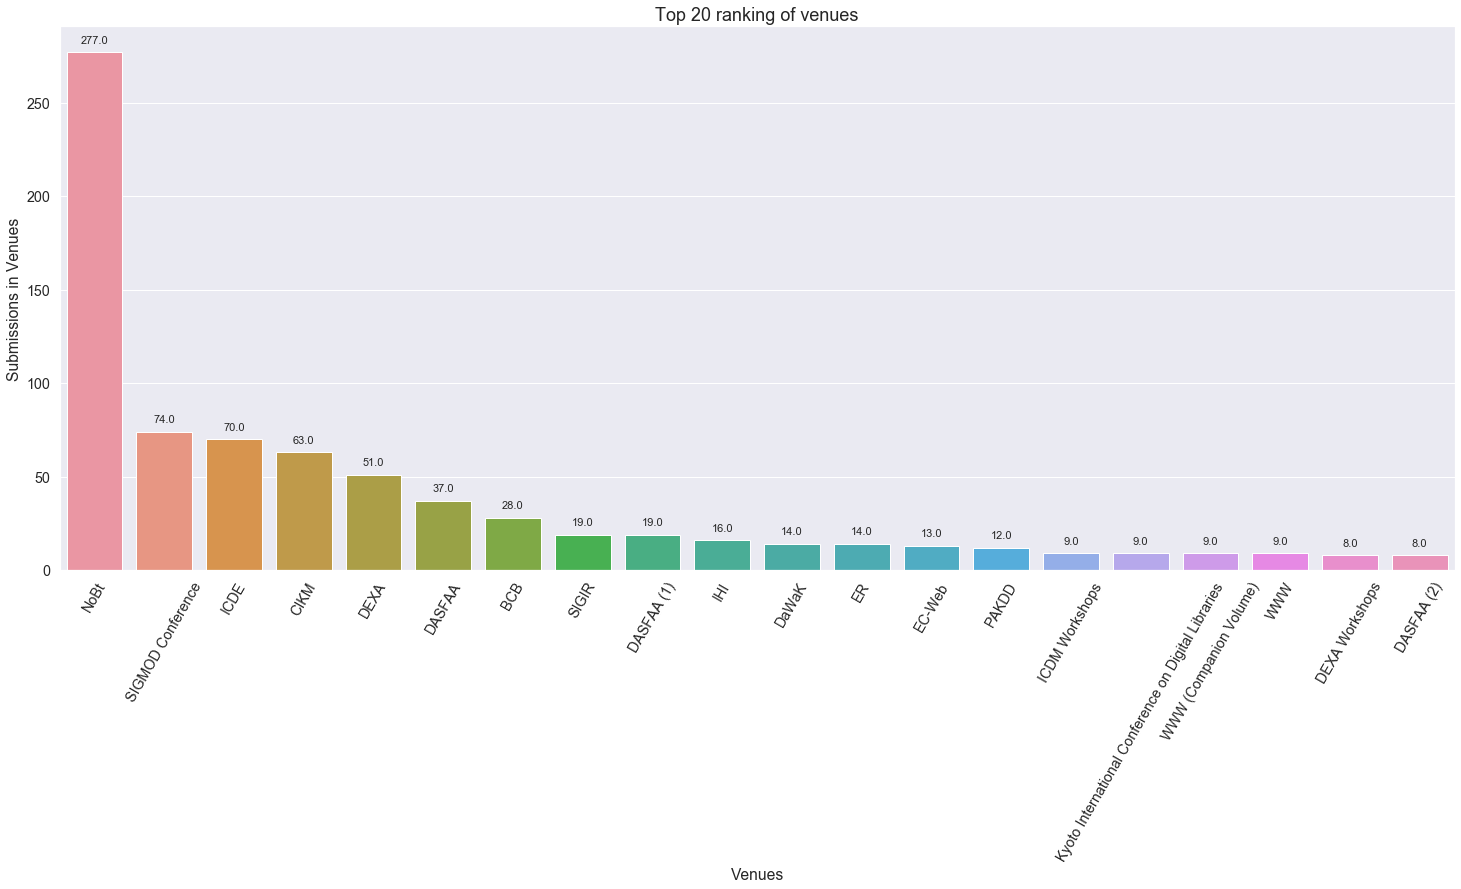

Total no. of venues : 56
Missing Data for venues : 0.00%
Top 20 :
 Venue
NoBt                                                                                                NoBt
SIGMOD Conference                                                                      SIGMOD Conference
ICDE                                                                                                ICDE
CIKM                                                                                                CIKM
DEXA                                                                                                DEXA
DASFAA                                                                                            DASFAA
BCB                                                                                                  BCB
SIGIR                                                                                              SIGIR
DASFAA (1)                                                                             

In [5]:
# Plotting top rank venues
venue_Grp = pd.DataFrame()
venue_Grp['venueCount'] = df.groupby(['Venue'])['Venue'].count()
venue_Grp['venue'] = venue_Grp.index

# There are too many authors, so we will subset the top authors
venue_Grp_top = venue_Grp.sort_values(by='venueCount',ascending=False).head(topmost)
order_venues = venue_Grp_top.sort_values(by='venueCount',ascending=False)['venue']

plt.figure(figsize=(25, 10))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x='venue', y='venueCount', data=venue_Grp_top, order=order_venues)
ax.set_title('Top ' + str(topmost) + ' ranking of venues', fontsize=18)
for rectBox in ax.patches:
    count = rectBox.get_height()
    #print("Counts :", count)    
    ax.text(rectBox.get_x() + rectBox.get_width()/2.,
            count + 5,
            count, # '{:1.2f}%'.format(count/total_counts*100) to get %
            ha="center", fontsize=11)


xt = plt.xticks(rotation=60)
plt.xlabel('Venues')
plt.ylabel('Submissions in Venues')
plt.show()

print("Total no. of venues :", len(venue_Grp.index))
print("Missing Data for venues : " +
      '{:1.2f}%'.format(df['Venue'].isnull().sum() / total_counts * 100))
print("Top " + str(topmost) + " :\n", venue_Grp_top['venue'])

for ctr in range(len(venue_Grp_top)):
    if (venue_Grp_top.iloc[ctr]['venue'] == -999):
        print("Found in Index", str(ctr) + ":", venue_Grp_top.iloc[ctr]['venueCount'])
        print("Missing Data : " + '{:1.2f}%'.format(venue_Grp_top.iloc[ctr]['venueCount'] / total_counts * 100))


# (1) Attempt to observe what venues/conferences are submitted by authors and ranked the topmost

In [6]:
by_author = df.groupby('Author')

for author, frame in by_author:
    print(frame, end="\n\n") # frame.head(2)

          Author       Venue
12   Adam Jatowt        NoBt
17   Adam Jatowt        NoBt
23   Adam Jatowt        CIKM
28   Adam Jatowt  DASFAA (1)
46   Adam Jatowt       SIGIR
65   Adam Jatowt        WSDM
100  Adam Jatowt        CIKM
115  Adam Jatowt       SIGIR
168  Adam Jatowt       SIGIR
195  Adam Jatowt        NoBt
270  Adam Jatowt     ACL (1)

        Author                                Venue
111  Aixin Sun                                SIGIR
250  Aixin Sun                                 NoBt
267  Aixin Sun                                 NoBt
306  Aixin Sun                                 NoBt
332  Aixin Sun                                SIGIR
341  Aixin Sun               WWW (Companion Volume)
345  Aixin Sun               WWW (Companion Volume)
361  Aixin Sun                                 EDBT
363  Aixin Sun                       ACM Multimedia
368  Aixin Sun                    SIGMOD Conference
426  Aixin Sun                                 ICMR
429  Aixin Sun             

In [7]:
# Sum all the submissions for all authors = No. of edges in venue categories (with duplicate edges) = same as df rows
print("Total no. of submissions for all authors :", sum(by_author.count().values)) # sum of venue counts for all authors

Total no. of submissions for all authors : [889]


In [8]:
# No. of submissions for author based on unique venues/conferences whereby the groups should be the same as the degree value
authors = ['Sourav S. Bhowmick', 'Adam Jatowt']
authors_rank_df = pd.DataFrame()
author_submissions_df = pd.DataFrame()

for author in authors:
    print("\n", author)
    print("-------------------")
    unique_venues, counts = np.unique(by_author.get_group(author)['Venue'], return_counts=True) # Adam Jatowt, Ba Quan Truong
    print("No. of each venue for " + author + " (descending order) :", (sorted(counts, reverse = True)))

    # Value of 248 instead of 251 is because the 4 proceedings" tag with no authors and also an author for "NoBt" which account for no booktitles
    print("No. of unique submitted venues for " + author + " :\n", by_author.get_group(author).count())

    # Attempt to compute "Top 5" positions
    author_venues_counts = list(zip(unique_venues, counts))

    # Modifies the original list with descending sorting order
    author_venues_counts.sort(key=lambda x: x[1],reverse = True)

    if author_venues_counts[0][0] != 'NoBt':
        first_tuple = [author, author_venues_counts[0]]
        second_tuple = [author, author_venues_counts[1]]
        third_tuple = [author, author_venues_counts[2]]
        fourth_tuple = [author, author_venues_counts[3]]
        fifth_tuple = [author, author_venues_counts[4]]
    else:
        first_tuple = [author, author_venues_counts[1]]
        second_tuple = [author, author_venues_counts[2]]
        third_tuple = [author, author_venues_counts[3]]
        fourth_tuple = [author, author_venues_counts[4]]
        fifth_tuple = [author, author_venues_counts[5]]

    print("The first position venue with total submission counts for " + author + " :", first_tuple)
    print("The second position venue with total submission counts for " + author + " :", second_tuple)
    print("The third position venue with total submission counts for " + author + " :", third_tuple)
    print("The fourth position venue with total submission counts for " + author + " :", fourth_tuple)
    print("The fifth position venue with total submission counts for " + author + " :", fifth_tuple)
    print("Venues and counts of " + author + " :\n", author_venues_counts)

    ranked_data = [first_tuple, second_tuple, third_tuple, fourth_tuple, fifth_tuple]

    # Create the topmost ranking venues for each author that have venue grouped
    # ['Author', ('Venue', 'Count')] consider as 2 columns
    tmp_author_rank_df = pd.DataFrame.from_records(ranked_data, columns =['Author', 'Venues with counts'])
    authors_rank_df = authors_rank_df.append(tmp_author_rank_df, ignore_index=True) 
    
    print(authors_rank_df)
    print("--------------------" + author + "--------------------")

    # Create for authors having submissions for each venue respectively
    tmp_author_submissions_df = pd.DataFrame({'Author': author, 'Venue': unique_venues, 'Submissions': counts})
    author_submissions_df = author_submissions_df.append(tmp_author_submissions_df, ignore_index=True) 

print("-------------- Get info from index 4 --------------")
print("Author :", authors_rank_df.iloc[4])
print("at Venue :", authors_rank_df.iloc[4][1])
print("with Count:", authors_rank_df.iloc[4][1][1])
print("---------------------------------------------------")
print("List of authors having submissions for each unique venue respectively :")
author_submissions_df


 Sourav S. Bhowmick
-------------------
No. of each venue for Sourav S. Bhowmick (descending order) : [76, 18, 16, 16, 16, 12, 7, 6, 6, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
No. of unique submitted venues for Sourav S. Bhowmick :
 Author    248
Venue     248
dtype: int64
The first position venue with total submission counts for Sourav S. Bhowmick : ['Sourav S. Bhowmick', ('CIKM', 18)]
The second position venue with total submission counts for Sourav S. Bhowmick : ['Sourav S. Bhowmick', ('DEXA', 16)]
The third position venue with total submission counts for Sourav S. Bhowmick : ['Sourav S. Bhowmick', ('ICDE', 16)]
The fourth position venue with total submission counts for Sourav S. Bhowmick : ['Sourav S. Bhowmick', ('SIGMOD Conference', 16)]
The fifth position venue with total submission counts for Sourav S. Bhowmick : ['Sourav S. Bhowmick', ('DASFAA', 12)]
Venues and counts of Sourav

,Author,Venue,Submissions
0,Sourav S. Bhowmick,ACL (1),1
1,Sourav S. Bhowmick,ACM Multimedia,3
2,Sourav S. Bhowmick,ADL,1
3,Sourav S. Bhowmick,APWeb,1
4,Sourav S. Bhowmick,BCB,7
5,Sourav S. Bhowmick,BigComp,1
6,Sourav S. Bhowmick,CIDR,1
7,Sourav S. Bhowmick,CIKM,18
8,Sourav S. Bhowmick,CoopIS/DOA/ODBASE,1
9,Sourav S. Bhowmick,CoopIS/DOA/ODBASE (2),1


In [9]:
authors = sorted(list(df.Author.unique()))
print("Total no. of unique authors :", len(authors))

authors

Total no. of unique authors : 175


['Adam Jatowt',
 'Aixin Sun',
 'Amey V. Laud',
 'Ang Kho Kiong',
 'Antoine Doucet',
 'Arijit Khan',
 'Aswani Rao Jannu',
 'Ba Quan Truong',
 'Benji Thian',
 'Bharat K. Bhargava',
 'Bipin C. Sakamuri',
 'Boon Siew Seah',
 'Byron Choi',
 'C. Forbes Dewey Jr.',
 'C. T. Huang',
 'Changjiu Jin',
 'Changsheng Sun',
 'Chaohui Wang',
 'Chengkai Li',
 'Chris Raymond',
 'Christina Lui',
 'Chunyan Miao',
 'Curtis E. Dyreson',
 'Dadabhai T. Singh',
 'Denis Shestakov',
 'Devanshu Dhyani',
 'Dhruv Swamini',
 'Ee Peng Lim',
 'Eric Chaudhry',
 'Erwin Leonardi',
 'Fajar Ardian',
 'Fan Zhang',
 'Feida Zhu 0001',
 'Fengqiong Qin',
 'Fengrong Li',
 'Francesco Bonchi',
 'Gao Cong',
 'Ge Bai',
 'George Rajesh',
 'Haibo Hu 0001',
 'Hanry Yu',
 'Hao Su',
 'Hasan M. Jamil',
 'Ho Hoang Hung',
 'Hong H. Nguyen',
 'Hong Jing Khok',
 'Hongmei Sun',
 'Huey Eng Chua',
 'Hui Li 0005',
 'Hyeonji Kim',
 'James Cheng',
 'Jeong Hoon Lee',
 'Jianfeng Ma',
 'Jiangtao Cui',
 'Jianliang Xu',
 'Jie Zheng',
 'Jie Zheng 0002',


In [10]:
authors_rank_df = pd.DataFrame()
author_submissions_df = pd.DataFrame()
topmost = 5
ranked_data = []
author_ranked_data = []

# for author, frame in by_author (alternative method)
for author in authors:
    unique_venues, counts = np.unique(by_author.get_group(author)['Venue'], return_counts=True) # Adam Jatowt, Ba Quan Truong
    
    num_unique_venues = len(unique_venues)
    #print("No. of unique venues for " + author + " : ", num_unique_venues)
    
    # Re-initialize ranked data list; clear causes complications in retaining the values
    # Caution : Maybe bugs in list clear; take a day to debug
    ranked_data = []

    # Attempt to compute "Top 5" positions
    author_venues_counts = list(zip(unique_venues, counts))

    # Modifies the original list with descending sorting order
    author_venues_counts.sort(key=lambda x: x[1],reverse = True)
    #print("Venues and counts of " + author + " :\n", author_venues_counts)

    # First venue is not 'NoBt'
    if author_venues_counts[0][0] != 'NoBt':
        # Not one less in case the 'NoBt'is in the middle of topmost venues and we can still pick topmost venues 
        if num_unique_venues > topmost:
            # Range runs from 0 to topmost-1 value inclusively; get only the values that is not "NoBt"
            for count in range(topmost):
                #rank_tuple = [author, author_venues_counts[count]]
                rank_tuple = author_venues_counts[count]
                
                if author_venues_counts[count][0] != 'NoBt':
                    ranked_data.append(rank_tuple)
                #else:
                    #print(str(num_unique_venues) + " Venues and counts of " + author + " :\n", author_venues_counts)
                    #print("Venue no. " + str(count + 1) + " in the middle is \"NoBt\"!")

            #print("Top " + str(topmost) + " ranked data without \"NoBt\" for " + author + " :\n", ranked_data)
            #print("--------------------------------------------")

        elif num_unique_venues > 0:
            # Range from 0 to num_unique_venues - 1 for correct indexing; get only the values that is not "NoBt"
            for count in range(num_unique_venues):
                #rank_tuple = [author, author_venues_counts[count]]
                rank_tuple = author_venues_counts[count]

                if author_venues_counts[count][0] != 'NoBt':
                    ranked_data.append(rank_tuple)
                #else:
                    #print(str(num_unique_venues) + " Venues and counts of " + author + " :\n", author_venues_counts)
                    #print("Venue no. " + str(count + 1) + " in the middle is \"NoBt\"!")
                
            #print("Only top " + str(num_unique_venues-1) + " ranked data without \"NoBt\" for " + author + " :\n", ranked_data)
            #print("--------------------------------------------")
        
        # Venues and counts of any author must be at least 1 venue without "NoBt"
        # Thus, do not need to check num_unique_venues <= 0
    else:
        # First venue is 'NoBt'
        if num_unique_venues > topmost:
            # Range runs from 1 to topmost value inclusively; get the next value that is not "NoBt"
            for count in range(1, topmost + 1):
                #rank_tuple = [author, author_venues_counts[count]]
                rank_tuple = author_venues_counts[count]
                ranked_data.append(rank_tuple)
            
            #print(str(num_unique_venues) + " Venues and counts of " + author + " :\n", author_venues_counts)
            #print("Top " + str(topmost) + " ranked data without \"NoBt\" for " + author + " :\n", ranked_data)
        elif num_unique_venues > 1:
            # Range from 1 to num_unique_venues - 1 for correct indexing; get the next value that is not "NoBt"
            for count in range(1, num_unique_venues):
                #rank_tuple = [author, author_venues_counts[count]]
                rank_tuple = author_venues_counts[count]
                ranked_data.append(rank_tuple)
            
            #print(str(num_unique_venues) + " Venues and counts of " + author + " :\n", author_venues_counts)
            #print("Only top " + str(num_unique_venues - 1) + " ranked data without \"NoBt\" for " + author + " :\n", ranked_data)
        #else:
            #print("Venues and counts of " + author + " :\n", author_venues_counts)
            #print("No. of unique venues for " + author + " (must be at least 2 venues including \"NoBt\") : ", num_unique_venues)
            #print("----------------------No ranked data----------------------")

    # Create the topmost ranking venues for each author that have venue grouped
    author_ranked_data.append(ranked_data)
    #print("Author ranked data for " + author + " :\n", author_ranked_data)
    #print("====================================================================================")

    #tmp_author_rank_df = pd.DataFrame.from_records(ranked_data, columns =['Author', 'Venues with counts'])
    #tmp_author_rank_df = pd.DataFrame(data=ranked_data)
    #authors_rank_df = authors_rank_df.append(tmp_author_rank_df, ignore_index=True) 
    
    # Create for authors having submissions for each venue respectively
    tmp_author_submissions_df = pd.DataFrame({'Author': author, 'Venue': unique_venues, 'Submissions': counts})
    
    # Continuous index and need to equate to the original dataframe
    author_submissions_df = author_submissions_df.append(tmp_author_submissions_df, ignore_index=True)

authors_rank_df = pd.DataFrame(author_ranked_data, columns=['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5'], index=authors)
authors_rank_df

,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5
Adam Jatowt,"(SIGIR, 3)","(CIKM, 2)","(ACL (1), 1)","(DASFAA (1), 1)","(WSDM, 1)"
Aixin Sun,"(ACM Multimedia, 3)","(CIKM, 3)","(WWW (Companion Volume), 3)","(SIGIR, 2)","(DASFAA (2), 1)"
Amey V. Laud,"(CIKM, 1)","(DEXA, 1)","(ICDE, 1)","(VLDB, 1)",None
Ang Kho Kiong,None,None,None,None,None
Antoine Doucet,"(CIKM, 2)",None,None,None,None
Arijit Khan,None,None,None,None,None
Aswani Rao Jannu,"(ICDE, 1)",None,None,None,None
Ba Quan Truong,"(SIGMOD Conference, 2)","(WWW (Companion Volume), 2)","(ACM Multimedia, 1)","(DASFAA (1), 1)","(DASFAA (2), 1)"
Benji Thian,"(ICDE, 1)",None,None,None,None
Bharat K. Bhargava,None,None,None,None,None


In [11]:
# Display ranked data with author name
authors_rank_df.loc['Sourav S. Bhowmick', :]

Rank 1                 (CIKM, 18)
Rank 2                 (DEXA, 16)
Rank 3                 (ICDE, 16)
Rank 4    (SIGMOD Conference, 16)
Rank 5               (DASFAA, 12)
Name: Sourav S. Bhowmick, dtype: object

In [12]:
# Accessing the individual elements
print("Check for None : ", authors_rank_df.iloc[157][3] == None)
print("Row 158 :\n", authors_rank_df.iloc[157])
print("\nRow 158, column 2 :", authors_rank_df.iloc[157][1])
print("Row 158, column 2, item 2 :", authors_rank_df.iloc[157][1][1])

Check for None :  True
Row 158 :
 Rank 1    (ACL (1), 1)
Rank 2       (WSDM, 1)
Rank 3            None
Rank 4            None
Rank 5            None
Name: Yating Zhang, dtype: object

Row 158, column 2 : ('WSDM', 1)
Row 158, column 2, item 2 : 1


In [13]:
venues = sorted(list(df.Venue.unique()))
print("Total no. of unique venues (incl. NoBt) :", len(venues))

venues

Total no. of unique venues (incl. NoBt) : 56


['ACL (1)',
 'ACM Multimedia',
 'ADL',
 'APWeb',
 'BCB',
 'BigComp',
 'CIDR',
 'CIKM',
 'CoopIS/DOA/ODBASE',
 'CoopIS/DOA/ODBASE (2)',
 'DASFAA',
 'DASFAA (1)',
 'DASFAA (2)',
 'DEXA',
 'DEXA (1)',
 'DEXA Workshops',
 'DOLAP',
 'DaWaK',
 'EC-Web',
 'EDBT',
 'ER',
 'ER (Workshops)',
 'ER Workshops',
 'Encyclopedia of Big Data Technologies',
 'FODO',
 'FQAS',
 'Foundations and Novel Approaches in Data Mining',
 'GRADES/NDA@SIGMOD/PODS',
 'Human Interaction with Graphs',
 'ICDCS',
 'ICDE',
 'ICDE Workshops',
 'ICDM Workshops',
 'ICMR',
 'ICPADS',
 'ICSC',
 'IDEAS',
 'IHI',
 'KDD',
 'Kyoto International Conference on Digital Libraries',
 'MMDB',
 'Mobile Data Management',
 'NoBt',
 'OTM Conferences (1)',
 'PAKDD',
 'PKDD',
 'Pacific Symposium on Biocomputing',
 'SIGIR',
 'SIGMOD Conference',
 'Social Media Modeling and Computing',
 'VLDB',
 'WISE Workshops',
 'WSDM',
 'WSM@MM',
 'WWW',
 'WWW (Companion Volume)']

In [14]:
# Categorise submissions by venue per author same value as the number of edges in graph (ie. 472)
author_submissions_df

,Author,Venue,Submissions
0,Adam Jatowt,ACL (1),1
1,Adam Jatowt,CIKM,2
2,Adam Jatowt,DASFAA (1),1
3,Adam Jatowt,NoBt,3
4,Adam Jatowt,SIGIR,3
5,Adam Jatowt,WSDM,1
6,Aixin Sun,ACM Multimedia,3
7,Aixin Sun,CIKM,3
8,Aixin Sun,DASFAA (2),1
9,Aixin Sun,EDBT,1


In [15]:
# Locating author's index
Author_Venues = pd.DataFrame()

# Non-unique Conferences/Venues
Author_Venues['venue_list'] = df.groupby('Author')['Venue']
print("No. of authors : ", Author_Venues.shape[0])

# Author_Venues['venue_list'][0] gives the first author
author_Venue_List = Author_Venues['venue_list'][126] # 'Sourav S. Bhowmick'
authors_Venue_List = Author_Venues['venue_list']

# Gives the list of venues for first author, index 0 is the name of the author
print("List of venues for " + author_Venue_List[0] + " : \n", author_Venue_List[1])

# Participated Conferences/Venues for each author 
unique_values, counts = np.unique(author_Venue_List[1], return_counts=True)
conference_dict = dict(zip(unique_values, counts))

conference_dict
for idx in range(len(unique_values)):
    print(str(unique_values[idx]) + " : (" + str(counts[idx]) + ")")
    
print("Sum of participated conferences :", sum(counts))

print("\n\nList of venues for all authors :")

indx = 0
for author in authors_Venue_List:
    #print("Author :", author[0])
    #print("Venue List :", author[1])
    author_conference_dict = dict({author[0]: author[1]})
    print(author_conference_dict)
    if author[0] == 'Sourav S. Bhowmick':
        print("***************************")
        print("Found author at location : ", indx)
        print("***************************")

    print("==========")
    indx += 1

print("Final Index for author :", indx)

No. of authors :  175
List of venues for Sourav S. Bhowmick : 
 0              NoBt
5              NoBt
9              NoBt
13             NoBt
16             NoBt
           ...     
870            DEXA
874    ER Workshops
878              ER
881    ER Workshops
885            FODO
Name: Venue, Length: 248, dtype: object
ACL (1) : (1)
ACM Multimedia : (3)
ADL : (1)
APWeb : (1)
BCB : (7)
BigComp : (1)
CIDR : (1)
CIKM : (18)
CoopIS/DOA/ODBASE : (1)
CoopIS/DOA/ODBASE (2) : (1)
DASFAA : (12)
DASFAA (1) : (6)
DASFAA (2) : (4)
DEXA : (16)
DEXA (1) : (1)
DEXA Workshops : (3)
DOLAP : (1)
DaWaK : (4)
EC-Web : (3)
EDBT : (2)
ER : (4)
ER (Workshops) : (1)
ER Workshops : (2)
Encyclopedia of Big Data Technologies : (1)
FODO : (1)
FQAS : (1)
Foundations and Novel Approaches in Data Mining : (1)
GRADES/NDA@SIGMOD/PODS : (1)
Human Interaction with Graphs : (1)
ICDCS : (1)
ICDE : (16)
ICDE Workshops : (1)
ICDM Workshops : (2)
ICMR : (1)
ICPADS : (1)
ICSC : (1)
IDEAS : (1)
IHI : (3)
KDD : (1)
Kyoto Int

## Setup filters only interested venues for plotting "author-venue" graph

In [16]:
# Tier 1 : VLDB, KDD
# Tier 2 : EDBT, ICDE, ICDM, SDM, CIKM
# Tier 3 : DASFAA, PAKDD, PKDD, DEXA
def intersection(list1, list2): 
    return list(set(list1) & set(list2))

# Read desired venues from configuration file (CSV formatted)
tier_venues_df = pd.read_csv('./interested_venues.csv')

tier_venues = tier_venues_df.values.flatten() # ndarray format
list(tier_venues)

['VLDB',
 'KDD',
 'EDBT',
 'ICDE',
 'ICDM',
 'SDM',
 'CIKM',
 'DASFAA',
 'PAKDD',
 'PKDD',
 'DEXA']

Popular venues : ['ACL (1)', 'ACM Multimedia', 'ADL', 'APWeb', 'BCB', 'BigComp', 'CIDR', 'CIKM', 'CoopIS/DOA/ODBASE', 'CoopIS/DOA/ODBASE (2)', 'DASFAA', 'DASFAA (1)', 'DASFAA (2)', 'DEXA', 'DEXA (1)', 'DEXA Workshops', 'DOLAP', 'DaWaK', 'EC-Web', 'EDBT', 'ER', 'ER (Workshops)', 'ER Workshops', 'Encyclopedia of Big Data Technologies', 'FODO', 'FQAS', 'Foundations and Novel Approaches in Data Mining', 'GRADES/NDA@SIGMOD/PODS', 'Human Interaction with Graphs', 'ICDCS', 'ICDE', 'ICDE Workshops', 'ICDM Workshops', 'ICMR', 'ICPADS', 'ICSC', 'IDEAS', 'IHI', 'KDD', 'Kyoto International Conference on Digital Libraries', 'MMDB', 'Mobile Data Management', 'NoBt', 'OTM Conferences (1)', 'PAKDD', 'PKDD', 'Pacific Symposium on Biocomputing', 'SIGIR', 'SIGMOD Conference', 'Social Media Modeling and Computing', 'VLDB', 'WISE Workshops', 'WSDM', 'WSM@MM', 'WWW', 'WWW (Companion Volume)']
Sorted Tier venues : ['CIKM', 'DASFAA', 'DEXA', 'EDBT', 'ICDE', 'ICDM', 'KDD', 'PAKDD', 'PKDD', 'SDM', 'VLDB']
Inter

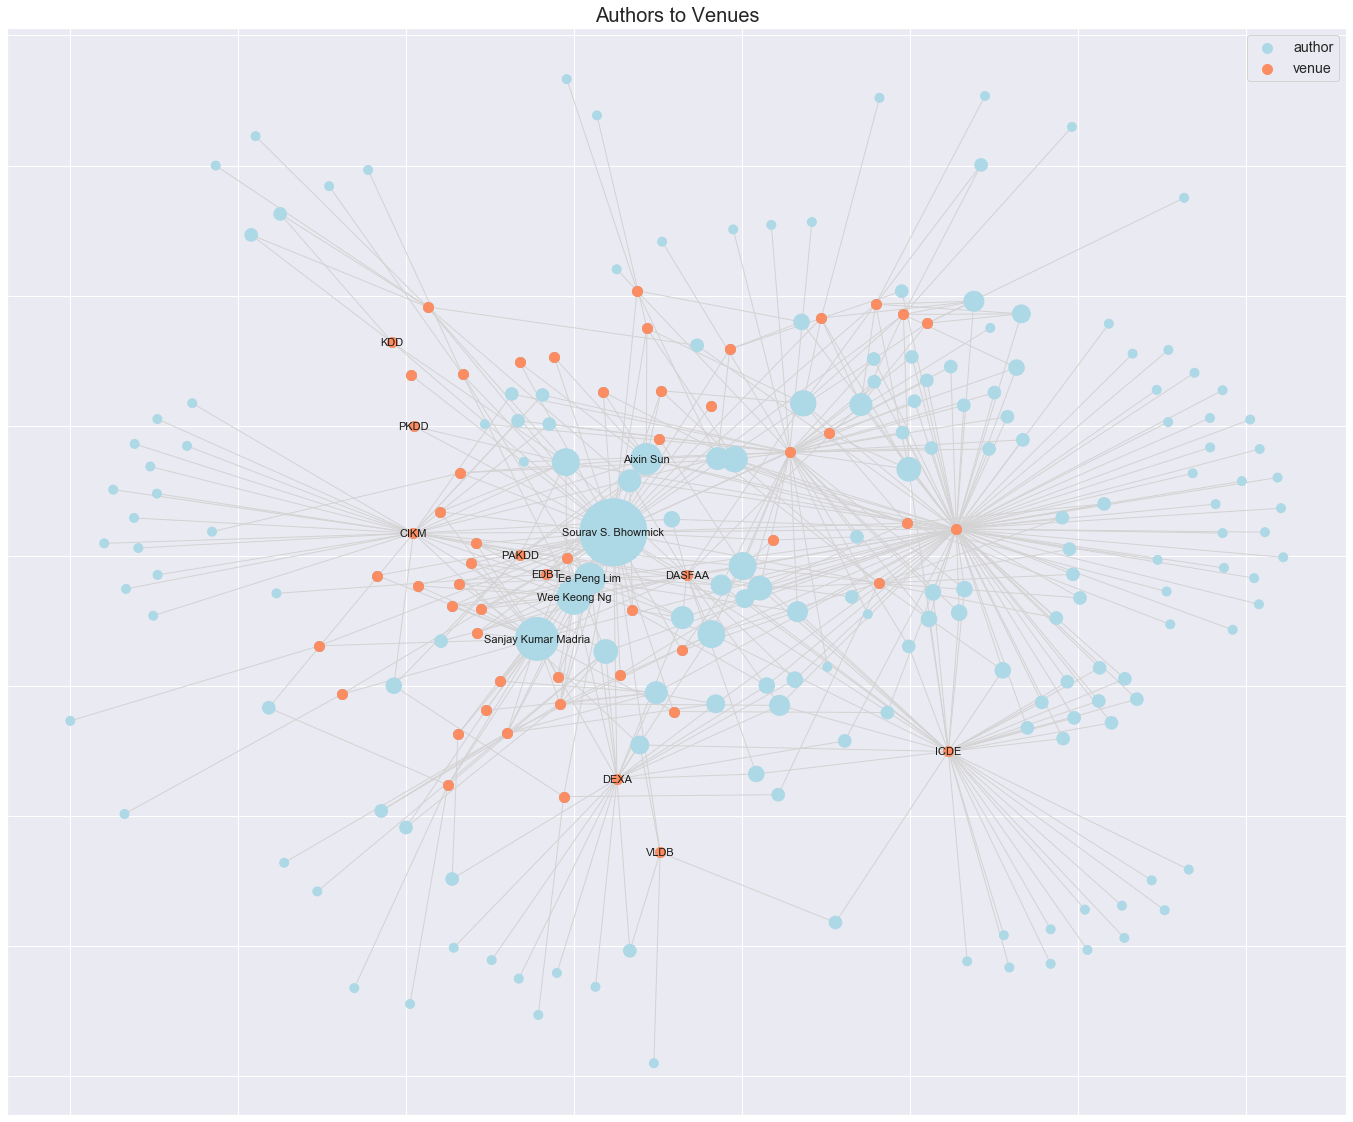

In [17]:
Graphtype = nx.Graph()

# 1. Create the graph
g = nx.from_pandas_edgelist(df, source='Author', target='Venue', create_using=Graphtype)

#layout = nx.spring_layout(g)

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

plt.figure(figsize=(24, 20))

# 3. Draw the relevant graph with nodes and links
# People small and grey

# Labels for authors ONLY
# People who are highly connected are a highlighted color

# Obtain degree of authors and multiply by 80 to get the circle size
# The respective size is proportional to the number of connections, degree
author_size = [g.degree(author) * 80 for author in authors]

# List of Author nodes are determined from the authors list and displayed nodes in lightblue
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=authors, 
                       node_size=author_size, # a list of sizes, based on degree centrality
                       node_color='lightblue')

# List of Venue nodes are determined from the venues list and displayed nodes in grey
nx.draw_networkx_nodes(g, layout, nodelist=venues, node_color='#AAAAAA', node_size=100) #cccccc

# Create a list of popular venues
popular_venues = [venue for venue in venues if g.degree(venue) > 0]
print("Popular venues :", popular_venues)
sorted_tier_venues = sorted(tier_venues)
print("Sorted Tier venues :", sorted_tier_venues)

displayed_venues = sorted(intersection(tier_venues, popular_venues))
print("Intersected venues :", displayed_venues)
venues_difference = set(tier_venues).symmetric_difference(displayed_venues)
print("Interested venues not present :", venues_difference)

# Create a list of popular authors
popular_authors = [author for author in authors if g.degree(author) > 10]
# Create nodes for popular authors mainly for legend labelling
nx.draw_networkx_nodes(g, layout, nodelist=popular_authors, node_color='lightblue', node_size=100, label='author') # lightblue

# List of popular venue nodes are determined from the popular_venues list and displayed nodes in orange
nx.draw_networkx_nodes(g, layout, nodelist=popular_venues, node_color='#fc8d62', node_size=100, label='venue') # orange

# Links/Edges are thin and displayed in lightgrey
nx.draw_networkx_edges(g, layout, width=1, edge_color="lightgrey") #cccccc

# Label the Venues
venue_labels = dict(zip(venues, venues))
displayed_venues_labels = dict(zip(displayed_venues, displayed_venues))

# Label the authors
authors_labels = dict(zip(authors, authors))
popular_authors_labels = dict(zip(popular_authors, popular_authors))

nx.draw_networkx_labels(g, layout, labels=popular_authors_labels, font_size=11) # author_labels
nx.draw_networkx_labels(g, layout, labels=displayed_venues_labels, font_size=11) # venue_labels
# font_family="sans-serif"

# 4. Turn off the axis
#plt.axis('off')
#nx.draw_networkx(g, layout)

plt.legend(loc='best')

plt.title("Authors to Venues", fontsize=20)
#save_fig("BhowmickSouravS_conf_graph")

# To remove node label coordinates and have matplotlib to show display
plt.show()

In [18]:
len(g.nodes) # Total no. of authors (175) and conferences (56)

231

In [19]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 231
Number of edges: 472
Average degree:   4.0866


## Property 1 : Small-world phenomenon

In [20]:
N = nx.number_of_nodes(g)
L = nx.number_of_edges(g)
dMax = nx.distance_measures.diameter(g)
k = (2 * L) / N

# work automatically for directed/undirected graph, should have to multiply by 2 for undirected graph
d = nx.average_shortest_path_length(g)

print("Diameter of graph : ", dMax)
print("Average degree of graph : ", float("{0:.4f}".format(k)))

print("Is this a directed graph : ", g.is_directed())
print("Average distance of graph : ", float("{0:.4f}".format(d)))

d_rand = np.log(N) / np.log(k)
print("Random network distance estimate, lnN/ln<k> : ", float("{0:.4f}".format(d_rand)))

Diameter of graph :  4
Average degree of graph :  4.0866
Is this a directed graph :  False
Average distance of graph :  3.0325
Random network distance estimate, lnN/ln<k> :  3.8662


In [21]:
degree_dict = (dict(g.degree))
degree_dict_values = degree_dict.values()
degree_dict_keys = degree_dict.keys()

max_dict_value = max(degree_dict_values)
max_dict_key = max(degree_dict, key=lambda k: degree_dict[k])

print("Degree Dictionary : ", degree_dict)
print("Max. degree : ", max_dict_value)
print("Max. degree key : ", max_dict_key)
print("Degree for venue, 'SIGMOD Conference' :", degree_dict['SIGMOD Conference'])

# Values for degrees are categories for unique conferences or authors; there might be multiple duplicates links/edges
# They are different from the unique values for book titles and respective counts in the total submissions/participations

Degree Dictionary :  {'Sourav S. Bhowmick': 56, 'NoBt': 92, 'Renchi Yang': 2, 'Jieming Shi': 1, 'Xiaokui Xiao': 4, 'Yin Yang': 1, 'Meng Wang 0015': 2, 'Hui Li 0005': 5, 'Jiangtao Cui': 3, 'Ping Liu': 1, 'Yijun Duan': 2, 'Adam Jatowt': 6, 'Masatoshi Yoshikawa': 2, 'Jin Yao Chin': 2, 'Xi Lin': 1, 'CIKM': 31, 'Yequan Wang': 1, 'Zengxiang Li': 1, 'Ricardo Campos 0001': 1, 'Antoine Doucet': 1, 'DASFAA (1)': 13, 'GRADES/NDA@SIGMOD/PODS': 1, 'Chaohui Wang': 1, 'ICDE': 40, 'Miao Xie': 2, 'Byron Choi': 9, 'Shuigeng Zhou': 5, 'Nathan Ng': 1, 'Peipei Yi': 2, 'Zhiwei Zhang': 1, 'Jianliang Xu': 3, 'Christina Lui': 1, 'SIGIR': 10, 'Kai Huang': 2, 'SIGMOD Conference': 43, 'Huey Eng Chua': 7, 'Zhewei Wei': 2, 'Jun Zhao': 2, 'Rong Hua Li': 2, 'Siyuan Liu': 2, 'Wanlu Zhang': 2, 'Shu Wang': 2, 'Wanyi Huang': 2, 'Shafiq R. Joty': 1, 'Yating Zhang': 3, 'WSDM': 4, 'Yuji Matsumoto 0001': 1, 'Encyclopedia of Big Data Technologies': 2, 'Mengting Xu': 1, 'Changsheng Sun': 1, 'Zhongyuan Jiang': 1, 'Human Interac

In [22]:
degree_list = list((g.degree))
degree_list

[('Sourav S. Bhowmick', 56),
 ('NoBt', 92),
 ('Renchi Yang', 2),
 ('Jieming Shi', 1),
 ('Xiaokui Xiao', 4),
 ('Yin Yang', 1),
 ('Meng Wang 0015', 2),
 ('Hui Li 0005', 5),
 ('Jiangtao Cui', 3),
 ('Ping Liu', 1),
 ('Yijun Duan', 2),
 ('Adam Jatowt', 6),
 ('Masatoshi Yoshikawa', 2),
 ('Jin Yao Chin', 2),
 ('Xi Lin', 1),
 ('CIKM', 31),
 ('Yequan Wang', 1),
 ('Zengxiang Li', 1),
 ('Ricardo Campos 0001', 1),
 ('Antoine Doucet', 1),
 ('DASFAA (1)', 13),
 ('GRADES/NDA@SIGMOD/PODS', 1),
 ('Chaohui Wang', 1),
 ('ICDE', 40),
 ('Miao Xie', 2),
 ('Byron Choi', 9),
 ('Shuigeng Zhou', 5),
 ('Nathan Ng', 1),
 ('Peipei Yi', 2),
 ('Zhiwei Zhang', 1),
 ('Jianliang Xu', 3),
 ('Christina Lui', 1),
 ('SIGIR', 10),
 ('Kai Huang', 2),
 ('SIGMOD Conference', 43),
 ('Huey Eng Chua', 7),
 ('Zhewei Wei', 2),
 ('Jun Zhao', 2),
 ('Rong Hua Li', 2),
 ('Siyuan Liu', 2),
 ('Wanlu Zhang', 2),
 ('Shu Wang', 2),
 ('Wanyi Huang', 2),
 ('Shafiq R. Joty', 1),
 ('Yating Zhang', 3),
 ('WSDM', 4),
 ('Yuji Matsumoto 0001', 1),


In [23]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
dmax = max(degree_sequence)

print("Sorted degree sequence :", degree_sequence)
print("Max. degree :", dmax)

Sorted degree sequence : [92, 56, 43, 40, 31, 23, 22, 17, 15, 13, 12, 12, 10, 10, 10, 9, 9, 9, 9, 8, 8, 8, 8, 8, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Max. degree : 92


In [24]:
degree_histogram = nx.degree_histogram(g)
print("Degree of an author :", g.degree('Sourav S. Bhowmick'))
print("No. of degree components (from 0 which is unconnected) :", len(degree_histogram))
print("Total no. of unique authors and conferences :", sum(degree_histogram))

Degree of an author : 56
No. of degree components (from 0 which is unconnected) : 93
Total no. of unique authors and conferences : 231


In [25]:
print("List of index and values :")

for index, value in zip(range(len(degree_histogram)), degree_histogram):
    print(index, value, end='; ')

List of index and values :
0 0; 1 88; 2 57; 3 23; 4 19; 5 9; 6 7; 7 4; 8 5; 9 4; 10 3; 11 0; 12 2; 13 1; 14 0; 15 1; 16 0; 17 1; 18 0; 19 0; 20 0; 21 0; 22 1; 23 1; 24 0; 25 0; 26 0; 27 0; 28 0; 29 0; 30 0; 31 1; 32 0; 33 0; 34 0; 35 0; 36 0; 37 0; 38 0; 39 0; 40 1; 41 0; 42 0; 43 1; 44 0; 45 0; 46 0; 47 0; 48 0; 49 0; 50 0; 51 0; 52 0; 53 0; 54 0; 55 0; 56 1; 57 0; 58 0; 59 0; 60 0; 61 0; 62 0; 63 0; 64 0; 65 0; 66 0; 67 0; 68 0; 69 0; 70 0; 71 0; 72 0; 73 0; 74 0; 75 0; 76 0; 77 0; 78 0; 79 0; 80 0; 81 0; 82 0; 83 0; 84 0; 85 0; 86 0; 87 0; 88 0; 89 0; 90 0; 91 0; 92 1; 

## Property 2 : Scale-free

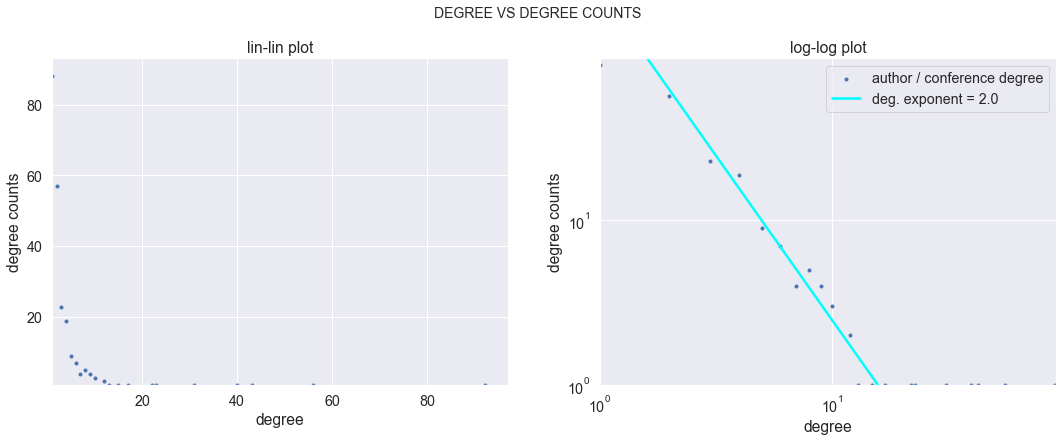

In [26]:
# The degrees here are for both the author (175) and conferences (56) 
degree_counts = degree_histogram
degree = list(range(len(degree_histogram)))

coeff = 250
power = -2.0
x = np.linspace(1, 100, num=10)
y = coeff * x**power
legend_labels = ['author / conference degree', 'deg. exponent = ' + str(-1*power)]
filler_space = 5

# Plotting graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle('Degree vs Degree Counts'.upper(), y=1.0, fontsize=14)

# Plot lin-lin graph on the left column
plt.subplot(1, 2, 1)

plt.xlabel(r'degree')
plt.xlim(1, max(degree) + filler_space)
plt.ylabel(r'degree counts')
plt.ylim(1, max(degree_counts) + filler_space)

#plt.legend(loc='best') # 'upper left'
plt.scatter(degree, degree_counts, marker='.')
plt.title(r'lin-lin plot')
plt.grid(True)

# Plot log-log graph on the right column
plt.subplot(1, 2, 2)
plt.xlabel('degree')
plt.xscale('log')
plt.xlim(1, max(degree_counts) + filler_space)
plt.ylabel('degree counts')
plt.yscale('log')
plt.ylim(1, max(degree) + filler_space)

plt.scatter(degree, degree_counts, marker='.', label=legend_labels[0])
plt.title('log-log plot')

# '$f(x) = '+str(power)+'\cdot x + \log('+ str(coeff) + ')$'
plt.plot(x, y, linewidth=2.5, color='cyan', label=legend_labels[1])
plt.legend(loc='best')

# Change the order displayed in the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.show()

## The plot above show that degree counts for authors tend to follow power-law

In [27]:
N = len(g.nodes)
prob_k = []
for k in degree_histogram:
    prob_k.append(k/N)
    
print(prob_k)

max(prob_k)

[0.0, 0.38095238095238093, 0.24675324675324675, 0.09956709956709957, 0.08225108225108226, 0.03896103896103896, 0.030303030303030304, 0.017316017316017316, 0.021645021645021644, 0.017316017316017316, 0.012987012987012988, 0.0, 0.008658008658008658, 0.004329004329004329, 0.0, 0.004329004329004329, 0.0, 0.004329004329004329, 0.0, 0.0, 0.0, 0.0, 0.004329004329004329, 0.004329004329004329, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004329004329004329, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004329004329004329, 0.0, 0.0, 0.004329004329004329, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004329004329004329, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004329004329004329]


0.38095238095238093

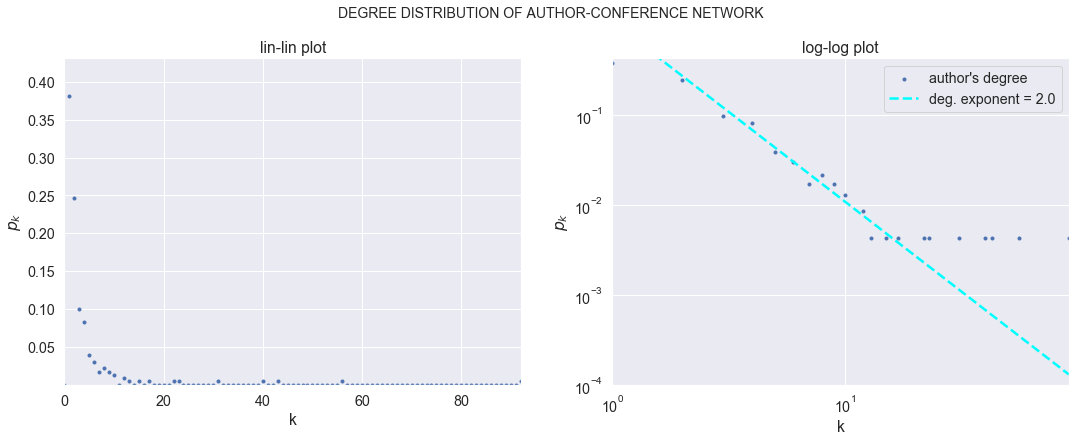

In [28]:
degree_counts = degree_histogram
degree = list(range(len(degree_histogram)))

coeff = 1.1
power = -2.0
x = np.linspace(1, max(degree), num=10)
y = coeff * x**power
legend_labels = ['author\'s degree', 'deg. exponent = ' + str(-1*power)]
filler_space = 0.05

# Plotting graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle('Degree Distribution of author-conference network'.upper(), y=1.0, fontsize=14)

# Plot lin-lin graph on the left column
plt.subplot(1, 2, 1)

plt.xlabel(r'k')
plt.xlim(0, max(degree) + filler_space)
plt.ylabel(r'$p_k$')
plt.ylim(0.0001, max(prob_k) + filler_space)

#plt.legend(loc='best') # 'upper left'
plt.scatter(degree, prob_k, marker='.')
plt.title(r'lin-lin plot')
plt.grid(True)

# Plot log-log graph on the right column
plt.subplot(1, 2, 2)
plt.xlabel('k')
plt.xscale('log')
plt.xlim(1, max(degree) + filler_space)
plt.ylabel(r'$p_k$')
plt.yscale('log')
plt.ylim(0.0001, max(prob_k) + filler_space)

plt.scatter(degree, prob_k, marker='.', label=legend_labels[0])
plt.title('log-log plot')

# '$f(x) = '+str(power)+'\cdot x + \log('+ str(coeff) + ')$'
plt.plot(x, y, '--', linewidth=2.5, color='cyan', label=legend_labels[1])
plt.legend(loc='best')

# Change the order displayed in the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.show()

## The plot above show that probability distributions for "author-conference" network tend to follow power-law as well

In [29]:
from collections import Counter
degree_dict = Counter(degree_dict)

degree_dict

Counter({'Sourav S. Bhowmick': 56,
         'NoBt': 92,
         'Renchi Yang': 2,
         'Jieming Shi': 1,
         'Xiaokui Xiao': 4,
         'Yin Yang': 1,
         'Meng Wang 0015': 2,
         'Hui Li 0005': 5,
         'Jiangtao Cui': 3,
         'Ping Liu': 1,
         'Yijun Duan': 2,
         'Adam Jatowt': 6,
         'Masatoshi Yoshikawa': 2,
         'Jin Yao Chin': 2,
         'Xi Lin': 1,
         'CIKM': 31,
         'Yequan Wang': 1,
         'Zengxiang Li': 1,
         'Ricardo Campos 0001': 1,
         'Antoine Doucet': 1,
         'DASFAA (1)': 13,
         'GRADES/NDA@SIGMOD/PODS': 1,
         'Chaohui Wang': 1,
         'ICDE': 40,
         'Miao Xie': 2,
         'Byron Choi': 9,
         'Shuigeng Zhou': 5,
         'Nathan Ng': 1,
         'Peipei Yi': 2,
         'Zhiwei Zhang': 1,
         'Jianliang Xu': 3,
         'Christina Lui': 1,
         'SIGIR': 10,
         'Kai Huang': 2,
         'SIGMOD Conference': 43,
         'Huey Eng Chua': 7,
         'Zh

In [30]:
# Verify total number of publications for author from python script
publications_list = [1, 3, 1, 1, 7, 1, 1, 18, 1, 1, 12, 7, 5, 18, 1, 3, 1, 4, 3, 2, 4, 1, 2, 1, 1, 1, 1, 1, 1,
                     1, 16, 1, 2, 1, 1, 1, 1, 3, 1, 2, 2, 1, 75, 1, 4, 1, 1, 6, 16, 1, 1, 1, 1, 1, 2, 3]
sum(publications_list)

251

# End of Program

## Observations from xml parsing script
- dblp refined by "Books and Theses, Conferences and Workshop Papers, Parts in Books or Collections, Editorship, Reference Works"
- 2 elements, b1 and b2 in "Books and Theses" are without booktitle making total counts of 176 instead of 178

## Titles with no authors :
------------------------------------------------------------------------------------------------------------------------------------
Element No. : 85
2014, DASFAA (1), 
No. of authors : 0
Database Systems for Advanced Applications 19th International Conference DASFAA 2014 Bali Indonesia April 21 24 2014 Proceedings Part I 
Element Tag : proceedings

------------------------------------------------------------------------------------------------------------------------------------

Element No. : 86
2014, DASFAA (2), 
No. of authors : 0
Database Systems for Advanced Applications 19th International Conference DASFAA 2014 Bali Indonesia April 21 24 2014 Proceedings Part II 
Element Tag : proceedings

------------------------------------------------------------------------------------------------------------------------------------

Element No. : 140
2009, DEXA, 
No. of authors : 0
Database and Expert Systems Applications 20th International Conference DEXA 2009 Linz Austria August 31 September 4 2009 Proceedings 
Element Tag : proceedings

------------------------------------------------------------------------------------------------------------------------------------

Element No. : 146
2008, DEXA, 
No. of authors : 0
Database and Expert Systems Applications 19th International Conference DEXA 2008 Turin Italy September 1 5 2008 Proceedings 
Element Tag : proceedings
    


## Note : The "authors" and "venues" can be replaced with "Node IDs" and "Locations" respectively for performing similar graph analysis